# Basic Scraping.

Using the NFL's stat page.

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl
cmap = cm.gnuplot



In [3]:
# imports for scraping

from bs4 import BeautifulSoup
import requests
import operator



In [4]:
teamcodes = [u'MIN', u'MIA', u'CAR', u'ATL', u'DET', \
             u'CIN', u'NYJ', u'DEN', u'BAL', u'NYG', \
             u'TEN', u'LA', u'DAL', u'NE', u'SEA',   \
             u'CHI', u'PIT', u'JAX', u'OAK', u'TB',  \
             u'HOU', u'GB', u'WAS', u'KC', u'PHI',   \
             u'BUF', u'NO', u'CLE', u'LAC', u'IND',  \
             u'ARI', u'SF']

In [12]:
r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=1&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&d-447263-p=1&statisticPositionCategory=RUNNING_BACK&qualified=true')


                  
#                  http://www.nfl.com/stats/categorystats?archive=false&conference=null&statisticPositionCategory=RUNNING_BACK&season=2017&seasonType=REG&experience=&tabSeq=1&qualified=true&Submit=Go')

#http://www.nfl.com/stats/categorystats?tabSeq=1&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&d-447263-p=2&conference=null&statisticPositionCategory=RUNNING_BACK&qualified=true
    
    # standard league
#https://www.fantasypros.com/nfl/rankings/consensus-cheatsheets.php

# [u'Rank\r\n\r\n', u'Player (Team)', u'Pos', u'Bye', \
#         0              1              2       3
#     u'Best', u'Worst', u'Avg', u'Std Dev', u'ADP', u'vs. ADP', u'Notes']
#        4          5      6        7           8         9        10


CarryDict = {}
TDDict = {}

r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=1&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&d-447263-p=1&statisticPositionCategory=RUNNING_BACK&qualified=true')


data = r.text

soup = BeautifulSoup(data)

tables = soup.findAll('table')

for indx,table in enumerate(tables): 
    
    print indx,[th.get_text() for th in table.find("tr").find_all("th")]
        
    for row in table.find_all("tr")[1:]:
            sav = [td.get_text().replace("\n", "").replace("\t", "") for td in row.find_all("td")]
            
            #print sav[2]
            
            try:
                CarryDict[sav[2]][sav[1]] = float(sav[4])
                TDDict[sav[2]][sav[1]] = float(sav[9])
                
            except:
                CarryDict[sav[2]] = {}
                CarryDict[sav[2]][sav[1]] = float(sav[4])
                
                TDDict[sav[2]] = {}
                TDDict[sav[2]][sav[1]] = float(sav[9])
   


r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=1&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&d-447263-p=2&statisticPositionCategory=RUNNING_BACK&qualified=true')


data = r.text

soup = BeautifulSoup(data)

tables = soup.findAll('table')

for indx,table in enumerate(tables): 
    
    print indx,[th.get_text() for th in table.find("tr").find_all("th")]
        
    for row in table.find_all("tr")[1:]:
            sav = [td.get_text().replace("\n", "").replace("\t", "") for td in row.find_all("td")]
            
            #print sav[2]
            
            try:
                CarryDict[sav[2]][sav[1]] = float(sav[4])
                TDDict[sav[2]][sav[1]] = float(sav[9])
                
            except:
                CarryDict[sav[2]] = {}
                CarryDict[sav[2]][sav[1]] = float(sav[4])
                
                TDDict[sav[2]] = {}
                TDDict[sav[2]][sav[1]] = float(sav[9])
   



0 [u'Rk', u'Player', u'Team', u'Pos', u'\nAtt', u'\nAtt/G', u'\nYds', u'\nAvg', u'\nYds/G', u'\nTD', u'\nLng', u'\n1st', u'\n1st%', u'\n20+', u'\n40+', u'\nFUM']
0 [u'Rk', u'Player', u'Team', u'Pos', u'\nAtt', u'\nAtt/G', u'\nYds', u'\nAvg', u'\nYds/G', u'\nTD', u'\nLng', u'\n1st', u'\n1st%', u'\n20+', u'\n40+', u'\nFUM']


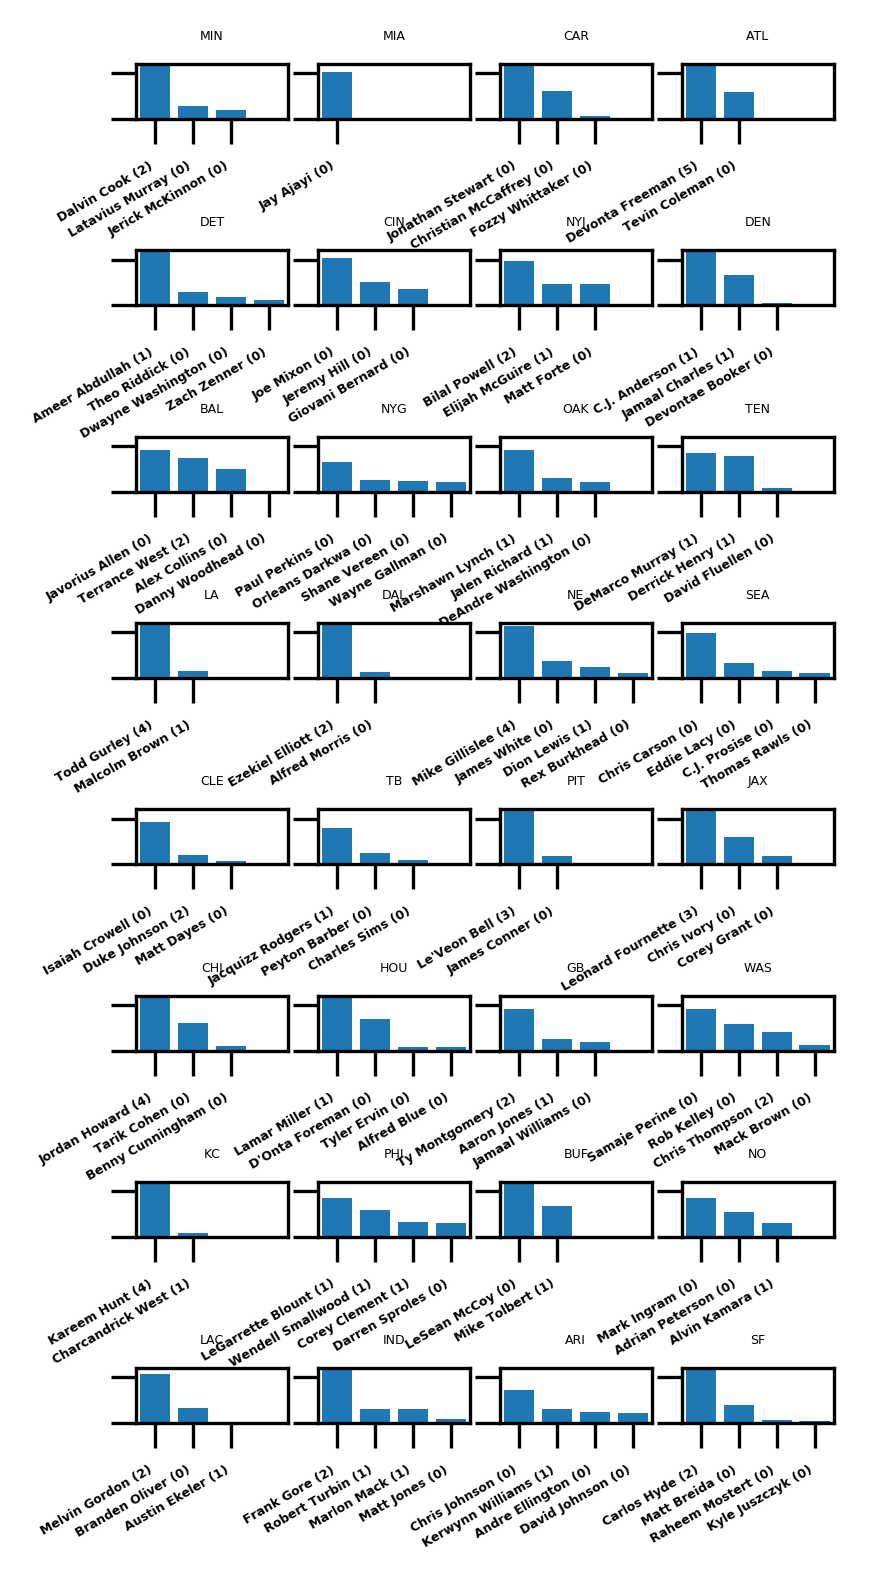

In [20]:
# all the running backs by carry

fig = plt.figure(figsize=(3,6))


for indx,team in enumerate(CarryDict.keys()):
    
    ax = fig.add_subplot(8,4,indx+1)
    
    use_order = (-1.*np.array(CarryDict[team].values())).argsort()
    
    ax.bar(np.arange(len(CarryDict[team].values())),np.array(CarryDict[team].values())[use_order])
    
    
    
    ax.set_xticks(np.arange(len(CarryDict[team].values())))
    
    ticklist = []
    for playernum in use_order:
        ticklist.append(str(np.array(CarryDict[team].keys())[playernum])+' ('+str(int(TDDict[team][np.array(CarryDict[team].keys())[playernum]]))+')')
        
    ax.set_xticklabels(ticklist,size=3)
    
    
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment("right")
    
    ax.set_yticklabels(())
    ax.axis([-0.5,3.5,0,60])
    #print team,CarryDict[team].values()
    ax.set_title(str(team),size=3)
    
    
plt.subplots_adjust(hspace=2.4)
#fig.tight_layout()

### Discussion points

#### Volume Matters
#### Order in touches matters
#### Quality of defense matters

In [7]:
# Look at the RECEIVING categories

#[u'Rk', u'Player', u'Team', u'Pos', u'\nRec', u'\nYds', \
#    u'\nAvg', u'\nYds/G', u'\nLng', u'\nTD', u'\n20+', u'\n40+', u'\n1st', u'\n1st%', u'\nFUM']
#   0        1         2        3       4         5
#       6         7           8          9       10         11       12        13          14


PlayerDict = {}

PlayerDict['Rec'] = {}
PlayerDict['TDs'] = {}
PlayerDict['Yds'] = {}


def grab_page(npage):

    r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=0&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&statisticCategory=RECEIVING&d-447263-p='+str(npage)+'&qualified=true')

    data = r.text


    soup = BeautifulSoup(data)

    tables = soup.findAll('table')

    for indx,table in enumerate(tables): 

        #print indx,[th.get_text() for th in table.find("tr").find_all("th")]

        for row in table.find_all("tr")[1:]:
                sav = [td.get_text().replace("\n", "").replace("\t", "") for td in row.find_all("td")]

                #print sav[2]

                try:
                    PlayerDict['Rec'][sav[2]][sav[1]] = float(sav[4])
                    PlayerDict['TDs'][sav[2]][sav[1]] = float(sav[9])
                    PlayerDict['Yds'][sav[2]][sav[1]] = float(sav[5])



                except:
                    PlayerDict['Rec'][sav[2]] = {}
                    PlayerDict['Rec'][sav[2]][sav[1]] = float(sav[4])
                    
                    PlayerDict['TDs'][sav[2]] = {}
                    PlayerDict['TDs'][sav[2]][sav[1]] = float(sav[9])
                    
                    PlayerDict['Yds'][sav[2]] = {}
                    PlayerDict['Yds'][sav[2]][sav[1]] = float(sav[5])



for x in range(1,10):
    
    print x
    
    try:
        grab_page(x)        
    except:
        break
                    

1
2
3
4
5
6
7
8
9


In [8]:
print PlayerDict['Rec'].keys()

[u'MIN', u'MIA', u'CAR', u'ATL', u'DET', u'CIN', u'NYJ', u'DEN', u'BAL', u'NYG', u'OAK', u'TEN', u'NO', u'DAL', u'NE', u'SEA', u'CHI', u'BUF', u'JAX', u'CLE', u'TB', u'HOU', u'GB', u'WAS', u'KC', u'PHI', u'PIT', u'LA', u'LAC', u'IND', u'ARI', u'SF']


In [9]:
# Identify Players with a certain number of carries

for team in PlayerDict['Rec'].keys():
    
    for player in PlayerDict['Rec'][team].keys():
        
        if PlayerDict['Rec'][team][player] > 8:
            print team,player,PlayerDict['Rec'][team][player]

MIN Adam Thielen 24.0
MIN Dalvin Cook 11.0
MIN Kyle Rudolph 10.0
MIN Stefon Diggs 22.0
MIA DeVante Parker 18.0
MIA Kenny Stills 9.0
MIA Jarvis Landry 25.0
CAR Devin Funchess 17.0
CAR Christian McCaffrey 22.0
CAR Kelvin Benjamin 13.0
ATL Tevin Coleman 13.0
ATL Julio Jones 19.0
ATL Mohamed Sanu 16.0
ATL Taylor Gabriel 10.0
ATL Austin Hooper 10.0
ATL Devonta Freeman 9.0
DET Ameer Abdullah 9.0
DET Eric Ebron 11.0
DET Golden Tate 24.0
DET Theo Riddick 14.0
CIN A.J. Green 25.0
CIN Tyler Kroft 10.0
CIN Brandon LaFell 10.0
CIN Joe Mixon 11.0
NYJ Jermaine Kearse 18.0
NYJ Austin Seferian-Jenkins 9.0
NYJ Jeremy Kerley 13.0
NYJ Robby Anderson 12.0
NYJ Bilal Powell 9.0
DEN Bennie Fowler 10.0
DEN Emmanuel Sanders 20.0
DEN Demaryius Thomas 18.0
DEN C.J. Anderson 10.0
BAL Benjamin Watson 16.0
BAL Nick Boyle 9.0
BAL Javorius Allen 16.0
BAL Jeremy Maclin 10.0
BAL Mike Wallace 9.0
NYG Evan Engram 19.0
NYG Sterling Shepard 21.0
NYG Brandon Marshall 16.0
NYG Shane Vereen 15.0
NYG Odell Beckham 20.0
OAK Set

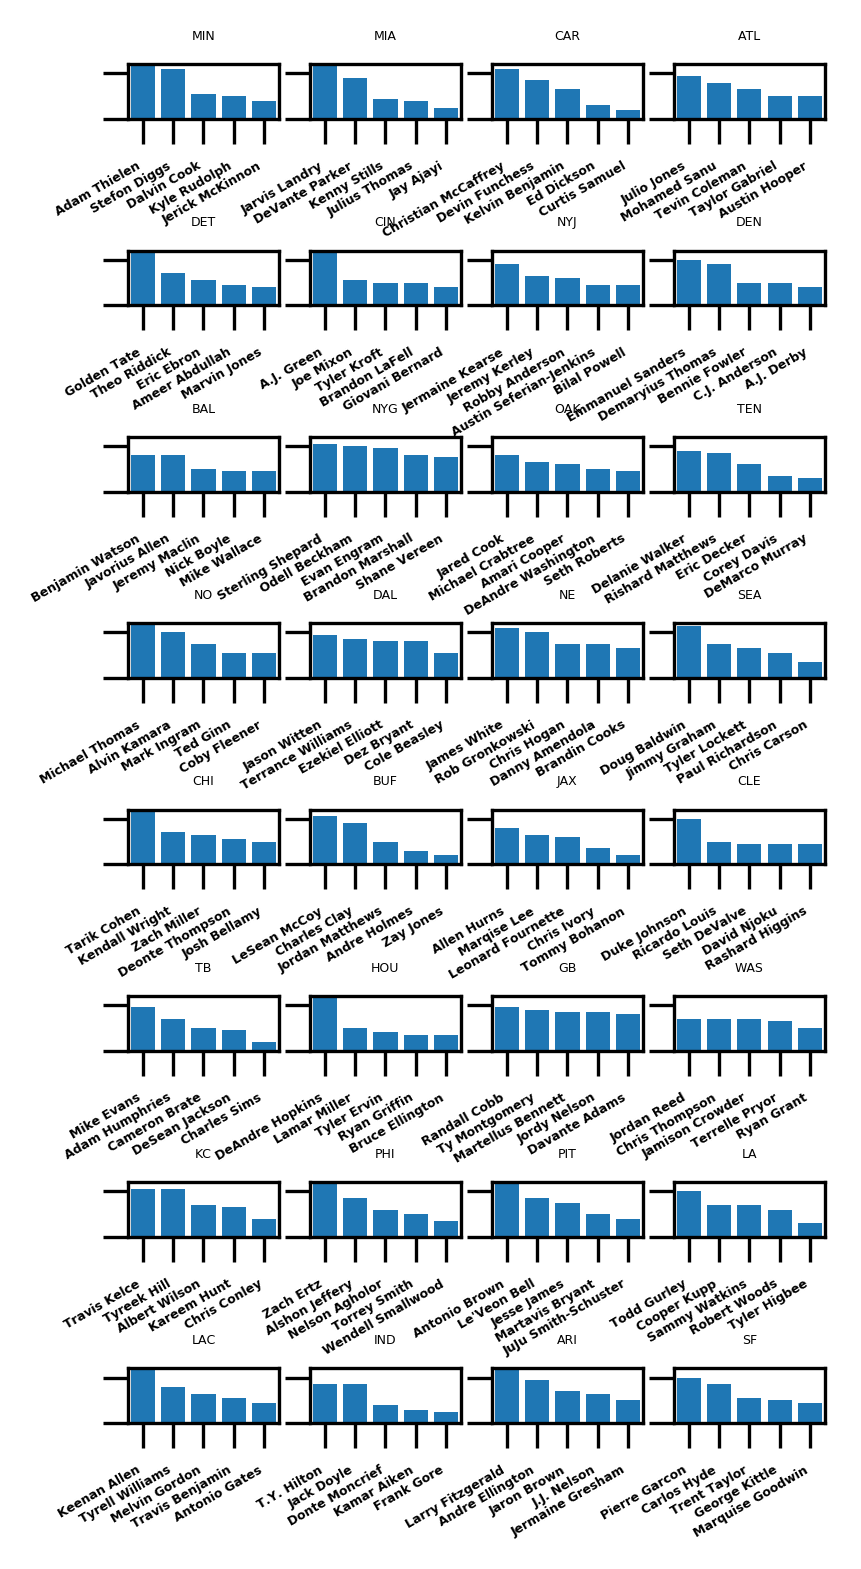

In [10]:
# all the running backs by carry

fig = plt.figure(figsize=(3,6))


for indx,team in enumerate(PlayerDict['Rec'].keys()):
    
    ax = fig.add_subplot(8,4,indx+1)
    
    use_order = (-1.*np.array(PlayerDict['Rec'][team].values())).argsort()
    
    ax.bar(np.arange(len(PlayerDict['Rec'][team].values())),np.array(PlayerDict['Rec'][team].values())[use_order])
    
    ax.set_xticks(np.arange(len(PlayerDict['Rec'][team].values())))
    ax.set_xticklabels(np.array(PlayerDict['Rec'][team].keys())[use_order],size=3)
    
    
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment("right")
    
    ax.set_yticklabels(())
    ax.axis([-0.5,4.5,0,24])
    #print team,CarryDict[team].values()
    ax.set_title(str(team),size=3)
    
    
plt.subplots_adjust(hspace=2.4)
#fig.tight_layout()

In [11]:
npage = 1

r  = requests.get('http://www.nfl.com/stats/categorystats?tabSeq=0&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&statisticCategory=RECEIVING&d-447263-p='+str(npage)+'&qualified=true')


http://www.nfl.com/stats/categorystats?tabSeq=0&season=2017&seasonType=REG&experience=&Submit=Go&archive=false&conference=null&statisticCategory=RUSHING&d-447263-p=1&qualified=true

data = r.text


soup = BeautifulSoup(data)

tables = soup.findAll('table')

for indx,table in enumerate(tables): 

        print indx,[th.get_text() for th in table.find("tr").find_all("th")]
        
        for row in table.find_all("tr")[1:]:
                sav = [td.get_text().replace("\n", "").replace("\t", "") for td in row.find_all("td")]

                print sav[2]

SyntaxError: invalid syntax (<ipython-input-11-5eb2bbcf357b>, line 6)